# Supervised Learning

## 1) Regression

### 1-1) Logistic Regression from scratch

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Step 1. Data Creation

In [2]:
m = 100 # 데이터 개수(sample, example)

In [3]:
# 어른 키와 몸무게
adult_height = np.random.normal(175, 5, [m, 1])
adult_weight = np.random.normal(70, 5, [m, 1])

In [4]:
adult_height

array([[ 172.66867365],
       [ 172.01202903],
       [ 169.77440803],
       [ 172.716237  ],
       [ 173.31533921],
       [ 176.34470475],
       [ 175.6523348 ],
       [ 176.96869073],
       [ 169.05736156],
       [ 179.75355947],
       [ 173.5624137 ],
       [ 171.84746624],
       [ 176.16436426],
       [ 170.06579109],
       [ 172.01765632],
       [ 171.51448602],
       [ 172.66652951],
       [ 181.78721218],
       [ 174.81578448],
       [ 171.45658461],
       [ 169.05920613],
       [ 176.71679078],
       [ 173.49706378],
       [ 184.20420965],
       [ 170.88829008],
       [ 175.05239864],
       [ 181.64283275],
       [ 176.96607837],
       [ 176.72872127],
       [ 182.03645083],
       [ 169.85405199],
       [ 176.57563393],
       [ 174.65447588],
       [ 180.49082738],
       [ 162.05630829],
       [ 170.46427437],
       [ 172.85171457],
       [ 175.63661725],
       [ 178.28699621],
       [ 180.66410113],
       [ 169.96698429],
       [ 176.560

In [5]:
adult_height

array([[ 172.66867365],
       [ 172.01202903],
       [ 169.77440803],
       [ 172.716237  ],
       [ 173.31533921],
       [ 176.34470475],
       [ 175.6523348 ],
       [ 176.96869073],
       [ 169.05736156],
       [ 179.75355947],
       [ 173.5624137 ],
       [ 171.84746624],
       [ 176.16436426],
       [ 170.06579109],
       [ 172.01765632],
       [ 171.51448602],
       [ 172.66652951],
       [ 181.78721218],
       [ 174.81578448],
       [ 171.45658461],
       [ 169.05920613],
       [ 176.71679078],
       [ 173.49706378],
       [ 184.20420965],
       [ 170.88829008],
       [ 175.05239864],
       [ 181.64283275],
       [ 176.96607837],
       [ 176.72872127],
       [ 182.03645083],
       [ 169.85405199],
       [ 176.57563393],
       [ 174.65447588],
       [ 180.49082738],
       [ 162.05630829],
       [ 170.46427437],
       [ 172.85171457],
       [ 175.63661725],
       [ 178.28699621],
       [ 180.66410113],
       [ 169.96698429],
       [ 176.560

In [6]:
adult_dataset = np.concatenate((adult_weight, adult_height), axis = 1)
print (adult_dataset.shape)
print (adult_dataset)

(100, 2)
[[  70.50007753  172.66867365]
 [  68.17647911  172.01202903]
 [  70.37074567  169.77440803]
 [  69.74772012  172.716237  ]
 [  65.00142753  173.31533921]
 [  72.65407652  176.34470475]
 [  64.66750197  175.6523348 ]
 [  77.31792729  176.96869073]
 [  74.73779325  169.05736156]
 [  65.33944309  179.75355947]
 [  68.66889048  173.5624137 ]
 [  74.34318347  171.84746624]
 [  74.21557695  176.16436426]
 [  63.72175794  170.06579109]
 [  66.82511851  172.01765632]
 [  62.9965043   171.51448602]
 [  70.42112365  172.66652951]
 [  75.65985875  181.78721218]
 [  71.86846467  174.81578448]
 [  69.0941571   171.45658461]
 [  74.13082633  169.05920613]
 [  70.19882298  176.71679078]
 [  74.2581666   173.49706378]
 [  65.57666308  184.20420965]
 [  66.42062988  170.88829008]
 [  74.12756263  175.05239864]
 [  75.34561954  181.64283275]
 [  73.05989952  176.96607837]
 [  67.68527853  176.72872127]
 [  73.23362862  182.03645083]
 [  78.45549554  169.85405199]
 [  69.907688    176.57563393]

In [7]:
# 아이 키와 몸무게
child_height = np.random.normal(120, 5, [m, 1])
child_weight = np.random.normal(30, 5, [m, 1])

In [8]:
child_dataset = np.concatenate((child_weight, child_height), axis = 1)
print (child_dataset.shape)
print (child_dataset)

(100, 2)
[[  32.81480968  118.54872379]
 [  33.92446955  116.85933418]
 [  26.85190308  121.04648186]
 [  28.97290129  118.92240529]
 [  29.90416207  122.13515579]
 [  30.86639922  120.11915886]
 [  37.31417136  114.23477255]
 [  33.34354808  124.97305765]
 [  32.98418724  110.3198058 ]
 [  25.7014794   112.9331651 ]
 [  29.33249463  116.54089295]
 [  35.29218408  129.78277196]
 [  36.13239486  117.97197219]
 [  27.33539267  115.29715734]
 [  23.37107672  124.83847279]
 [  23.75015246  124.24409592]
 [  32.75147077  123.71435459]
 [  25.71403529  114.81948687]
 [  18.52073513  119.30989567]
 [  33.32438236  111.20002524]
 [  38.37109219  128.78104607]
 [  35.13209927  125.59484882]
 [  28.33204324  118.18551932]
 [  26.19002244  114.52784042]
 [  42.28381275  122.59124925]
 [  27.24976829  120.4197791 ]
 [  37.99053414  120.07301937]
 [  35.80601151  119.24855082]
 [  34.65066552  122.29854144]
 [  31.45743742  125.21464728]
 [  25.92316174  120.0510179 ]
 [  39.83799817  123.11315601]

In [9]:
total_dataset = np.concatenate((adult_dataset , child_dataset))
print (total_dataset.shape)
print (total_dataset)

(200, 2)
[[  70.50007753  172.66867365]
 [  68.17647911  172.01202903]
 [  70.37074567  169.77440803]
 [  69.74772012  172.716237  ]
 [  65.00142753  173.31533921]
 [  72.65407652  176.34470475]
 [  64.66750197  175.6523348 ]
 [  77.31792729  176.96869073]
 [  74.73779325  169.05736156]
 [  65.33944309  179.75355947]
 [  68.66889048  173.5624137 ]
 [  74.34318347  171.84746624]
 [  74.21557695  176.16436426]
 [  63.72175794  170.06579109]
 [  66.82511851  172.01765632]
 [  62.9965043   171.51448602]
 [  70.42112365  172.66652951]
 [  75.65985875  181.78721218]
 [  71.86846467  174.81578448]
 [  69.0941571   171.45658461]
 [  74.13082633  169.05920613]
 [  70.19882298  176.71679078]
 [  74.2581666   173.49706378]
 [  65.57666308  184.20420965]
 [  66.42062988  170.88829008]
 [  74.12756263  175.05239864]
 [  75.34561954  181.64283275]
 [  73.05989952  176.96607837]
 [  67.68527853  176.72872127]
 [  73.23362862  182.03645083]
 [  78.45549554  169.85405199]
 [  69.907688    176.57563393]

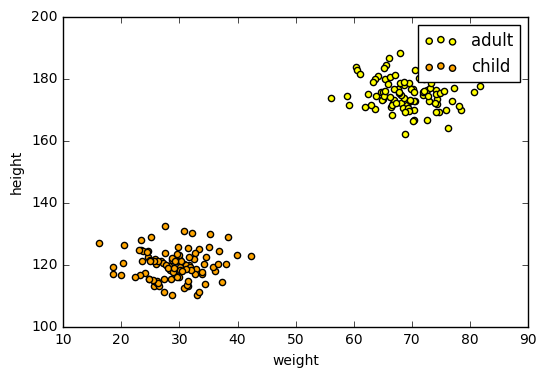

In [10]:
plt.scatter(total_dataset[:100,0], total_dataset[:100,1], c='yellow', label = 'adult')
plt.scatter(total_dataset[100:,0], total_dataset[100:,1], c='orange', label = 'child')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend()
plt.show()

In [11]:
# 어른 : 1, 아이 : 0
adult_label = np.ones(shape=[m,1])
child_label = np.zeros(shape=[m,1])
total_label = np.concatenate((adult_label, child_label))
print (total_label.shape)
print (total_label)

(200, 1)
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0

In [12]:
total = np.concatenate((total_dataset , total_label), axis=1)
print (total.shape)
print (total)

(200, 3)
[[  70.50007753  172.66867365    1.        ]
 [  68.17647911  172.01202903    1.        ]
 [  70.37074567  169.77440803    1.        ]
 [  69.74772012  172.716237      1.        ]
 [  65.00142753  173.31533921    1.        ]
 [  72.65407652  176.34470475    1.        ]
 [  64.66750197  175.6523348     1.        ]
 [  77.31792729  176.96869073    1.        ]
 [  74.73779325  169.05736156    1.        ]
 [  65.33944309  179.75355947    1.        ]
 [  68.66889048  173.5624137     1.        ]
 [  74.34318347  171.84746624    1.        ]
 [  74.21557695  176.16436426    1.        ]
 [  63.72175794  170.06579109    1.        ]
 [  66.82511851  172.01765632    1.        ]
 [  62.9965043   171.51448602    1.        ]
 [  70.42112365  172.66652951    1.        ]
 [  75.65985875  181.78721218    1.        ]
 [  71.86846467  174.81578448    1.        ]
 [  69.0941571   171.45658461    1.        ]
 [  74.13082633  169.05920613    1.        ]
 [  70.19882298  176.71679078    1.        ]
 

In [13]:
# scaling
weight_mean= total[:, 0].mean()
height_mean= total[:, 1].mean()
total[:, 0] /= weight_mean
total[:, 1] /= height_mean
print (total)

[[ 1.43216516  1.16996357  1.        ]
 [ 1.38496271  1.16551429  1.        ]
 [ 1.42953787  1.15035268  1.        ]
 [ 1.41688149  1.17028584  1.        ]
 [ 1.32046351  1.17434522  1.        ]
 [ 1.47592231  1.19487152  1.        ]
 [ 1.31368002  1.19018017  1.        ]
 [ 1.57066553  1.1990995   1.        ]
 [ 1.51825172  1.14549414  1.        ]
 [ 1.32733009  1.21796914  1.        ]
 [ 1.39496574  1.17601935  1.        ]
 [ 1.51023547  1.16439925  1.        ]
 [ 1.50764322  1.19364957  1.        ]
 [ 1.29446782  1.15232703  1.        ]
 [ 1.35751066  1.16555242  1.        ]
 [ 1.27973475  1.16214305  1.        ]
 [ 1.43056126  1.16994904  1.        ]
 [ 1.53698291  1.2317487   1.        ]
 [ 1.4599631   1.1845119   1.        ]
 [ 1.40360477  1.16175073  1.        ]
 [ 1.50592156  1.14550664  1.        ]
 [ 1.42604537  1.19739269  1.        ]
 [ 1.5085084   1.17557655  1.        ]
 [ 1.33214907  1.24812573  1.        ]
 [ 1.34929373  1.15790009  1.        ]
 [ 1.50585526  1.18611514

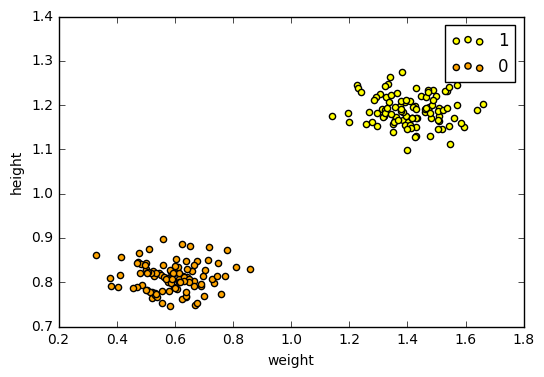

In [14]:
plt.scatter(total[:100,0], total[:100,1], c='yellow', label = '1')
plt.scatter(total[100:,0], total[100:,1], c='orange', label = '0')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend()
plt.show()

# Step 2. Model definition

In [15]:
def hypothesis(x, w, b):
    pred = np.matmul(x, w.T) + b
    return pred

In [16]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [17]:
def cost(x, w, b, y):
    loss = -y*hypothesis(x, w, b) + np.log(1 + np.exp(hypothesis(x, w, b))) #-y*h(x) + log(1+exp(h(x)))
    cost = (1/m)*np.sum(loss)
    return cost

In [18]:
def derivative(x, w, b, y):
    dw = -(1/m)* np.sum(x * (y - sigmoid(hypothesis(x, w, b))) , axis = 0) # 1 x w_dim
    db = -(1/m)* np.sum(y - sigmoid(hypothesis(x, w, b)), axis = 0 )
    return dw, db

In [19]:
def update(x, w, b, y, alpha):
    w = w - alpha*(derivative(x, w, b, y)[0]) # w := w + alpha * dw
    b = b - alpha*(derivative(x, w, b, y)[1]) # b := b + alpha * db
    return w, b

# Step 3. Training model

In [20]:
# initialization of weights and bias
w = np.array([[0, 0]])
b = 0

x = total[:, :2] # weight, height
y = total[:, 2:3] # label

cost = 0.546132196947
w = [[ 2.97519328 -0.02143783]]
b = [-2.69310095]


cost = 0.545963967524
w = [[ 2.97611197 -0.02146407]]
b = [-2.69401723]


cost = 0.545795836081
w = [[ 2.97703039 -0.02149028]]
b = [-2.69493325]


cost = 0.545627802539
w = [[ 2.97794854 -0.02151647]]
b = [-2.69584901]


cost = 0.545459866819
w = [[ 2.97886643 -0.02154264]]
b = [-2.6967645]


cost = 0.545292028842
w = [[ 2.97978404 -0.02156879]]
b = [-2.69767974]


cost = 0.545124288529
w = [[ 2.98070138 -0.02159491]]
b = [-2.6985947]


cost = 0.544956645801
w = [[ 2.98161845 -0.02162101]]
b = [-2.69950941]


cost = 0.544789100579
w = [[ 2.98253525 -0.02164708]]
b = [-2.70042385]


cost = 0.544621652785
w = [[ 2.98345178 -0.02167313]]
b = [-2.70133804]


cost = 0.544454302339
w = [[ 2.98436804 -0.02169916]]
b = [-2.70225196]


cost = 0.544287049164
w = [[ 2.98528403 -0.02172517]]
b = [-2.70316561]


cost = 0.54411989318
w = [[ 2.98619975 -0.02175115]]
b = [-2.70407901]


cost = 0.54395283431
w = [[ 2.9871152  -0

b = [-2.83994892]


cost = 0.519644041944
w = [[ 3.123212   -0.02546468]]
b = [-2.8408238]


cost = 0.519490962737
w = [[ 3.12408781 -0.02548731]]
b = [-2.84169843]


cost = 0.519337969441
w = [[ 3.12496337 -0.02550991]]
b = [-2.84257281]


cost = 0.519185061987
w = [[ 3.12583869 -0.02553249]]
b = [-2.84344696]


cost = 0.51903224031
w = [[ 3.12671375 -0.02555506]]
b = [-2.84432087]


cost = 0.51887950434
w = [[ 3.12758857 -0.0255776 ]]
b = [-2.84519453]


cost = 0.518726854013
w = [[ 3.12846313 -0.02560012]]
b = [-2.84606795]


cost = 0.518574289259
w = [[ 3.12933745 -0.02562262]]
b = [-2.84694113]


cost = 0.518421810013
w = [[ 3.13021152 -0.0256451 ]]
b = [-2.84781407]


cost = 0.518269416207
w = [[ 3.13108535 -0.02566756]]
b = [-2.84868677]


cost = 0.518117107774
w = [[ 3.13195892 -0.02569   ]]
b = [-2.84955923]


cost = 0.517964884648
w = [[ 3.13283225 -0.02571242]]
b = [-2.85043145]


cost = 0.517812746761
w = [[ 3.13370533 -0.02573481]]
b = [-2.85130342]


cost = 0.517660694047

w = [[ 3.34369721 -0.03071215]]
b = [-3.06123703]


cost = 0.482286813994
w = [[ 3.34451202 -0.03072987]]
b = [-3.06205243]


cost = 0.48215411962
w = [[ 3.3453266  -0.03074757]]
b = [-3.06286762]


cost = 0.482021495532
w = [[ 3.34614096 -0.03076526]]
b = [-3.0636826]


cost = 0.48188894168
w = [[ 3.34695511 -0.03078293]]
b = [-3.06449737]


cost = 0.48175645801
w = [[ 3.34776903 -0.03080058]]
b = [-3.06531193]


cost = 0.48162404447
w = [[ 3.34858274 -0.03081821]]
b = [-3.06612627]


cost = 0.481491701008
w = [[ 3.34939623 -0.03083583]]
b = [-3.0669404]


cost = 0.481359427572
w = [[ 3.3502095  -0.03085343]]
b = [-3.06775432]


cost = 0.481227224108
w = [[ 3.35102255 -0.03087101]]
b = [-3.06856803]


cost = 0.481095090565
w = [[ 3.35183538 -0.03088858]]
b = [-3.06938152]


cost = 0.480963026891
w = [[ 3.35264799 -0.03090613]]
b = [-3.0701948]


cost = 0.480831033034
w = [[ 3.35346039 -0.03092366]]
b = [-3.07100788]


cost = 0.480699108941
w = [[ 3.35427257 -0.03094118]]
b = [-3.07182

cost = 0.460333583077
w = [[ 3.48226328 -0.03354796]]
b = [-3.20000297]


cost = 0.460212306659
w = [[ 3.48304149 -0.03356287]]
b = [-3.20078287]


cost = 0.460091092128
w = [[ 3.48381949 -0.03357777]]
b = [-3.20156256]


cost = 0.459969939438
w = [[ 3.48459729 -0.03359266]]
b = [-3.20234206]


cost = 0.459848848546
w = [[ 3.4853749  -0.03360753]]
b = [-3.20312137]


cost = 0.459727819405
w = [[ 3.4861523  -0.03362238]]
b = [-3.20390047]


cost = 0.459606851972
w = [[ 3.48692949 -0.03363722]]
b = [-3.20467939]


cost = 0.459485946202
w = [[ 3.48770649 -0.03365205]]
b = [-3.20545811]


cost = 0.45936510205
w = [[ 3.48848329 -0.03366686]]
b = [-3.20623663]


cost = 0.459244319472
w = [[ 3.48925988 -0.03368165]]
b = [-3.20701496]


cost = 0.459123598424
w = [[ 3.49003627 -0.03369643]]
b = [-3.20779309]


cost = 0.45900293886
w = [[ 3.49081247 -0.0337112 ]]
b = [-3.20857103]


cost = 0.458882340736
w = [[ 3.49158846 -0.03372595]]
b = [-3.20934877]


cost = 0.458761804009
w = [[ 3.49236425 

cost = 0.437693034955
w = [[ 3.63104969 -0.0361938 ]]
b = [-3.34923039]


cost = 0.437583080155
w = [[ 3.63179009 -0.03620593]]
b = [-3.34997359]


cost = 0.43747317919
w = [[ 3.63253031 -0.03621805]]
b = [-3.35071662]


cost = 0.437363332022
w = [[ 3.63327034 -0.03623015]]
b = [-3.35145946]


cost = 0.437253538614
w = [[ 3.63401018 -0.03624224]]
b = [-3.35220213]


cost = 0.437143798927
w = [[ 3.63474985 -0.03625432]]
b = [-3.35294461]


cost = 0.437034112926
w = [[ 3.63548933 -0.03626638]]
b = [-3.35368692]


cost = 0.436924480571
w = [[ 3.63622862 -0.03627843]]
b = [-3.35442905]


cost = 0.436814901825
w = [[ 3.63696773 -0.03629047]]
b = [-3.355171]


cost = 0.436705376652
w = [[ 3.63770666 -0.03630249]]
b = [-3.35591278]


cost = 0.436595905014
w = [[ 3.6384454 -0.0363145]]
b = [-3.35665437]


cost = 0.436486486873
w = [[ 3.63918396 -0.0363265 ]]
b = [-3.35739579]


cost = 0.436377122193
w = [[ 3.63992234 -0.03633848]]
b = [-3.35813703]


cost = 0.436267810936
w = [[ 3.64066053 -0.

cost = 0.422293488694
w = [[ 3.73652402 -0.03781799]]
b = [-3.4551666]


cost = 0.422190963456
w = [[ 3.73723854 -0.03782828]]
b = [-3.45588468]


cost = 0.422088486932
w = [[ 3.73795289 -0.03783856]]
b = [-3.4566026]


cost = 0.42198605909
w = [[ 3.73866707 -0.03784882]]
b = [-3.45732035]


cost = 0.421883679896
w = [[ 3.73938107 -0.03785908]]
b = [-3.45803793]


cost = 0.421781349317
w = [[ 3.7400949  -0.03786932]]
b = [-3.45875535]


cost = 0.421679067321
w = [[ 3.74080856 -0.03787955]]
b = [-3.4594726]


cost = 0.421576833874
w = [[ 3.74152204 -0.03788976]]
b = [-3.46018968]


cost = 0.421474648944
w = [[ 3.74223536 -0.03789997]]
b = [-3.46090659]


cost = 0.421372512496
w = [[ 3.7429485  -0.03791016]]
b = [-3.46162334]


cost = 0.4212704245
w = [[ 3.74366147 -0.03792034]]
b = [-3.46233992]


cost = 0.421168384921
w = [[ 3.74437426 -0.03793051]]
b = [-3.46305633]


cost = 0.421066393727
w = [[ 3.74508689 -0.03794067]]
b = [-3.46377257]


cost = 0.420964450884
w = [[ 3.74579934 -0.0

b = [-3.53736465]


cost = 0.410620204907
w = [[ 3.81897047 -0.03894175]]
b = [-3.53806377]


cost = 0.41052316175
w = [[ 3.81966529 -0.03895067]]
b = [-3.53876273]


cost = 0.410426163618
w = [[ 3.82035995 -0.03895959]]
b = [-3.53946153]


cost = 0.410329210482
w = [[ 3.82105444 -0.03896849]]
b = [-3.54016018]


cost = 0.410232302313
w = [[ 3.82174877 -0.03897738]]
b = [-3.54085866]


cost = 0.410135439079
w = [[ 3.82244293 -0.03898626]]
b = [-3.54155698]


cost = 0.410038620752
w = [[ 3.82313693 -0.03899513]]
b = [-3.54225515]


cost = 0.409941847302
w = [[ 3.82383077 -0.03900399]]
b = [-3.54295315]


cost = 0.409845118698
w = [[ 3.82452444 -0.03901284]]
b = [-3.543651]


cost = 0.409748434911
w = [[ 3.82521795 -0.03902167]]
b = [-3.54434868]


cost = 0.409651795911
w = [[ 3.8259113 -0.0390305]]
b = [-3.54504621]


cost = 0.409555201668
w = [[ 3.82660448 -0.03903931]]
b = [-3.54574358]


cost = 0.409458652152
w = [[ 3.8272975  -0.03904812]]
b = [-3.5464408]


cost = 0.409362147334
w 

w = [[ 3.93478882 -0.04030345]]
b = [-3.65465266]


cost = 0.394656582582
w = [[ 3.93545673 -0.04031056]]
b = [-3.6553255]


cost = 0.394566823182
w = [[ 3.9361245  -0.04031767]]
b = [-3.65599818]


cost = 0.394477104031
w = [[ 3.93679211 -0.04032477]]
b = [-3.65667072]


cost = 0.394387425105
w = [[ 3.93745957 -0.04033185]]
b = [-3.65734311]


cost = 0.394297786376
w = [[ 3.93812688 -0.04033893]]
b = [-3.65801536]


cost = 0.39420818782
w = [[ 3.93879403 -0.04034599]]
b = [-3.65868745]


cost = 0.394118629409
w = [[ 3.93946103 -0.04035305]]
b = [-3.6593594]


cost = 0.394029111118
w = [[ 3.94012789 -0.0403601 ]]
b = [-3.6600312]


cost = 0.393939632922
w = [[ 3.94079458 -0.04036713]]
b = [-3.66070285]


cost = 0.393850194794
w = [[ 3.94146113 -0.04037416]]
b = [-3.66137436]


cost = 0.393760796708
w = [[ 3.94212752 -0.04038117]]
b = [-3.66204571]


cost = 0.39367143864
w = [[ 3.94279377 -0.04038818]]
b = [-3.66271692]


cost = 0.393582120562
w = [[ 3.94345986 -0.04039517]]
b = [-3.663

cost = 0.379872193715
w = [[ 4.04747945 -0.04138419]]
b = [-3.76825202]


cost = 0.379788956195
w = [[ 4.04812204 -0.04138966]]
b = [-3.76890025]


cost = 0.379705754776
w = [[ 4.04876449 -0.04139512]]
b = [-3.76954835]


cost = 0.379622589436
w = [[ 4.0494068  -0.04140057]]
b = [-3.77019631]


cost = 0.379539460152
w = [[ 4.05004897 -0.04140601]]
b = [-3.77084413]


cost = 0.379456366902
w = [[ 4.050691   -0.04141145]]
b = [-3.77149182]


cost = 0.379373309663
w = [[ 4.05133288 -0.04141687]]
b = [-3.77213936]


cost = 0.379290288412
w = [[ 4.05197463 -0.04142229]]
b = [-3.77278677]


cost = 0.379207303127
w = [[ 4.05261623 -0.0414277 ]]
b = [-3.77343404]


cost = 0.379124353785
w = [[ 4.05325769 -0.04143309]]
b = [-3.77408118]


cost = 0.379041440364
w = [[ 4.05389901 -0.04143848]]
b = [-3.77472817]


cost = 0.378958562842
w = [[ 4.05454018 -0.04144386]]
b = [-3.77537503]


cost = 0.378875721195
w = [[ 4.05518122 -0.04144923]]
b = [-3.77602175]


cost = 0.378792915403
w = [[ 4.0558221

cost = 0.365373072943
w = [[ 4.16153098 -0.04223169]]
b = [-3.88338822]


cost = 0.365296018304
w = [[ 4.16214878 -0.0422356 ]]
b = [-3.88401236]


cost = 0.365218995953
w = [[ 4.16276646 -0.04223951]]
b = [-3.88463638]


cost = 0.36514200587
w = [[ 4.16338401 -0.04224341]]
b = [-3.88526027]


cost = 0.365065048035
w = [[ 4.16400142 -0.0422473 ]]
b = [-3.88588403]


cost = 0.36498812243
w = [[ 4.1646187  -0.04225118]]
b = [-3.88650767]


cost = 0.364911229033
w = [[ 4.16523585 -0.04225505]]
b = [-3.88713117]


cost = 0.364834367827
w = [[ 4.16585287 -0.04225892]]
b = [-3.88775455]


cost = 0.364757538791
w = [[ 4.16646976 -0.04226277]]
b = [-3.8883778]


cost = 0.364680741905
w = [[ 4.16708651 -0.04226662]]
b = [-3.88900092]


cost = 0.364603977151
w = [[ 4.16770313 -0.04227046]]
b = [-3.88962391]


cost = 0.364527244509
w = [[ 4.16831963 -0.0422743 ]]
b = [-3.89024678]


cost = 0.364450543959
w = [[ 4.16893599 -0.04227812]]
b = [-3.89086951]


cost = 0.364373875483
w = [[ 4.16955222 -

cost = 0.354600343762
w = [[ 4.24916183 -0.04271385]]
b = [-3.97196843]


cost = 0.354527743976
w = [[ 4.24976116 -0.04271664]]
b = [-3.97257461]


cost = 0.354455173806
w = [[ 4.25036037 -0.04271942]]
b = [-3.97318066]


cost = 0.354382633234
w = [[ 4.25095945 -0.0427222 ]]
b = [-3.9737866]


cost = 0.354310122244
w = [[ 4.25155841 -0.04272497]]
b = [-3.97439241]


cost = 0.354237640817
w = [[ 4.25215724 -0.04272773]]
b = [-3.97499811]


cost = 0.354165188936
w = [[ 4.25275595 -0.04273048]]
b = [-3.97560368]


cost = 0.354092766583
w = [[ 4.25335454 -0.04273323]]
b = [-3.97620913]


cost = 0.354020373742
w = [[ 4.253953   -0.04273597]]
b = [-3.97681446]


cost = 0.353948010394
w = [[ 4.25455134 -0.0427387 ]]
b = [-3.97741967]


cost = 0.353875676523
w = [[ 4.25514955 -0.04274142]]
b = [-3.97802476]


cost = 0.35380337211
w = [[ 4.25574764 -0.04274414]]
b = [-3.97862973]


cost = 0.353731097139
w = [[ 4.2563456  -0.04274685]]
b = [-3.97923457]


cost = 0.353658851591
w = [[ 4.25694344 

w = [[ 4.33943765 -0.04305638]]
b = [-4.06333027]


cost = 0.343758708087
w = [[ 4.34001846 -0.04305808]]
b = [-4.06391842]


cost = 0.343690470263
w = [[ 4.34059914 -0.04305977]]
b = [-4.06450646]


cost = 0.343622259505
w = [[ 4.34117971 -0.04306145]]
b = [-4.06509438]


cost = 0.343554075797
w = [[ 4.34176017 -0.04306313]]
b = [-4.06568219]


cost = 0.343485919123
w = [[ 4.3423405 -0.0430648]]
b = [-4.06626988]


cost = 0.343417789467
w = [[ 4.34292072 -0.04306646]]
b = [-4.06685746]


cost = 0.343349686815
w = [[ 4.34350082 -0.04306811]]
b = [-4.06744493]


cost = 0.34328161115
w = [[ 4.3440808  -0.04306976]]
b = [-4.06803228]


cost = 0.343213562457
w = [[ 4.34466066 -0.0430714 ]]
b = [-4.06861952]


cost = 0.343145540721
w = [[ 4.34524041 -0.04307304]]
b = [-4.06920664]


cost = 0.343077545925
w = [[ 4.34582004 -0.04307466]]
b = [-4.06979365]


cost = 0.343009578055
w = [[ 4.34639956 -0.04307628]]
b = [-4.07038054]


cost = 0.342941637094
w = [[ 4.34697895 -0.0430779 ]]
b = [-4.0

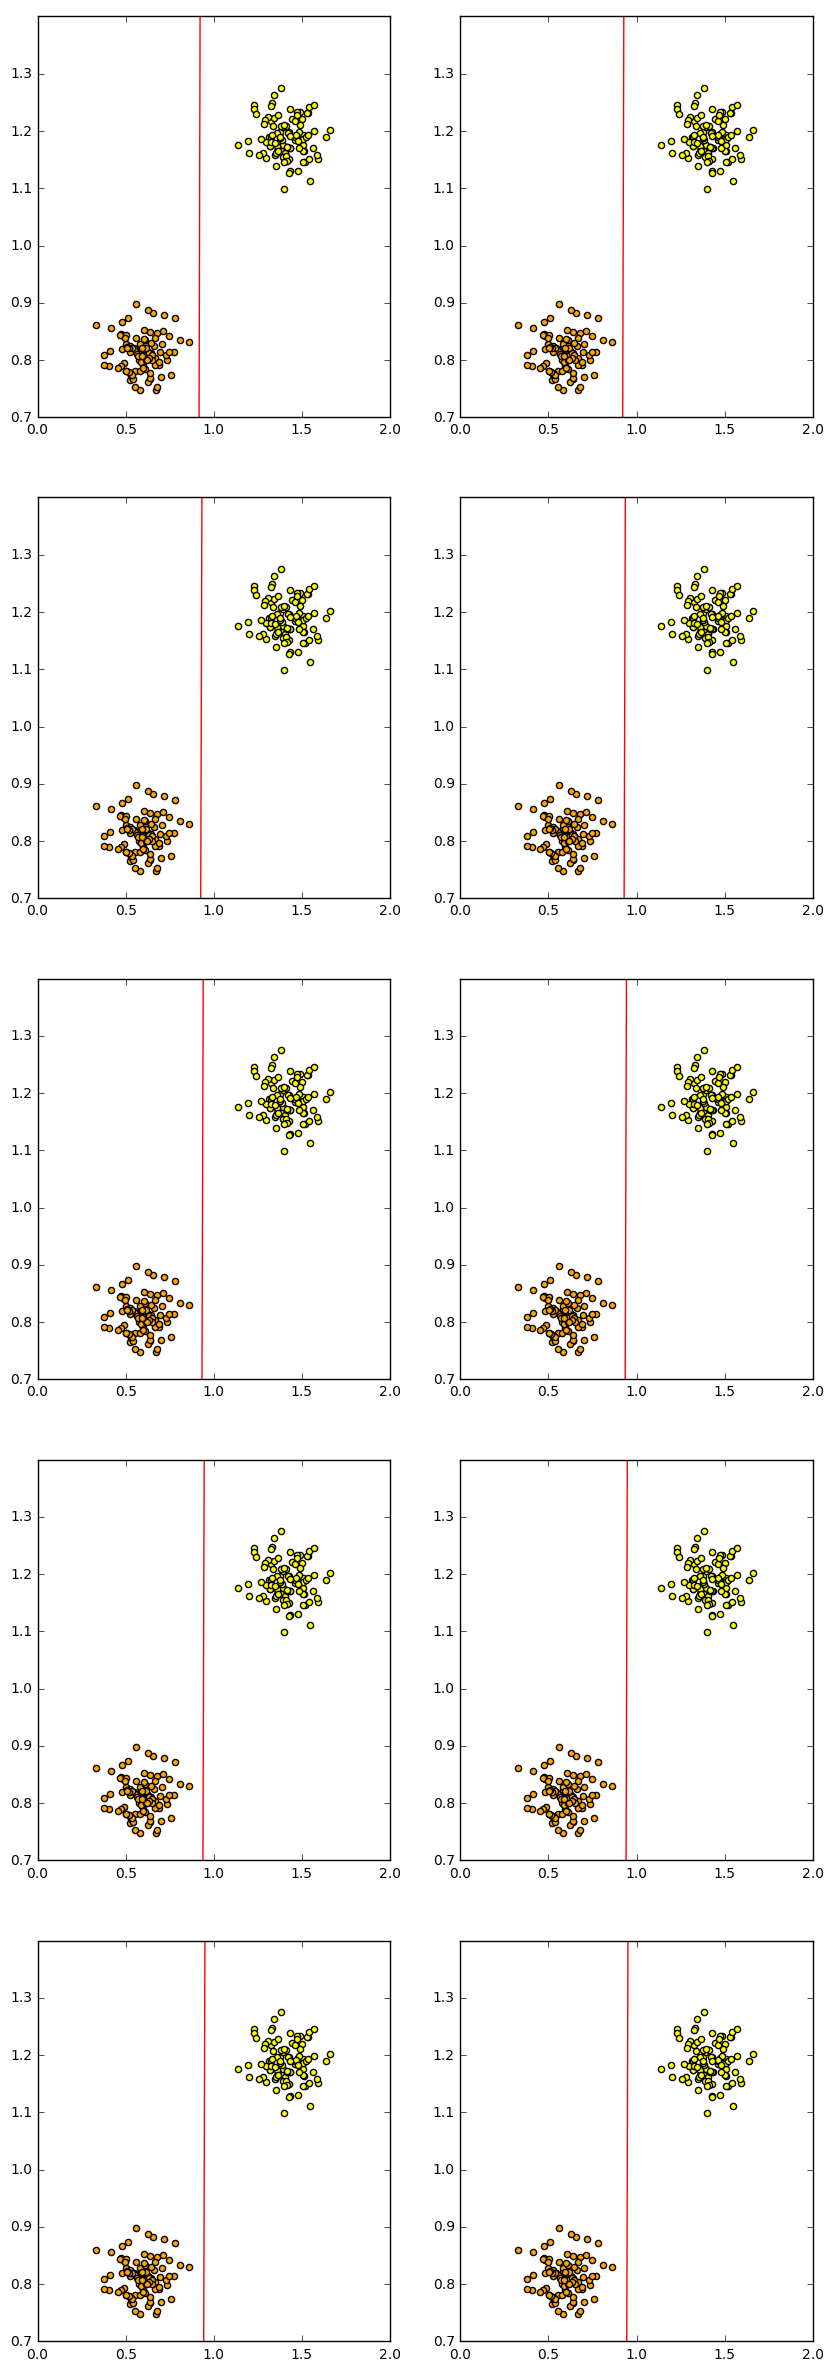

In [24]:
count = 1
fig = plt.figure(figsize=(10,30))

for i in range(1,2001):
    print ('cost =',cost(x, w, b, y))
    w, b = update(x, w, b, y, alpha=0.01)
    print ('w =',w)
    print ('b =',b)
    print ('\n')
    
    w1 = w[0][0]
    w2 = w[0][1]
    
    if i % 200 == 0:
        ax = fig.add_subplot(5,2,count)
        ax.scatter(total[:100,0], total[:100,1], c='yellow', label = '1')
        ax.scatter(total[100:,0], total[100:,1], c='orange', label = '0')
        line_x = np.linspace(0.2,1.8,1000)
        line_y = -(w1/w2)*line_x - b/w2 # w1x1 + w2x2 + b = 0 (x2 = -(w1/w2)x1 + (b/w2))
        ax.set_ylim(0.7,1.4)
        ax.plot(line_x, line_y, 'r')
        count += 1

### 1-2) Logistic Regression with scikit-learn

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()

In [27]:
x = total[:, :2] # weight, height
y = total[:, 2:3] # label
reshaped_y = y.reshape((200,))

In [28]:
model.fit(x,reshaped_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
model.coef_

array([[ 4.83619582,  0.12218866]])

In [30]:
model.intercept_

array([-4.73795687])

In [31]:
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]
b = model.intercept_[0]

print ('w1 =', w1)
print ('w2 =', w2)
print ('b =', b)

w1 = 4.83619582395
w2 = 0.122188664391
b = -4.73795686931


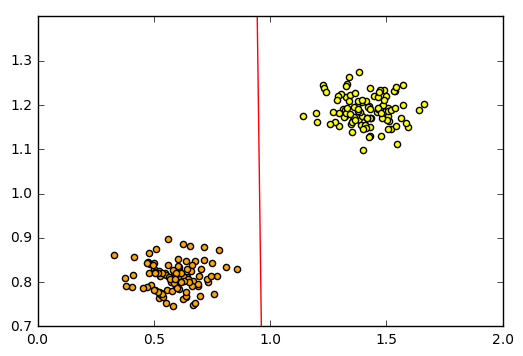

In [32]:
plt.scatter(total[:100,0], total[:100,1], c='yellow', label = '1')
plt.scatter(total[100:,0], total[100:,1], c='orange', label = '0')
line_x = np.linspace(0.2,1.8,1000)
line_y = -(w1/w2)*line_x - b/w2 # w1x1 + w2x2 + b = 0 (x2 = -(w1/w2)x1 + (b/w2))
plt.ylim(0.7,1.4)
plt.plot(line_x, line_y, 'r')
plt.show()

### 1-3) Polynomial Linear Regression

In [229]:
m = 100

class1_feature1 = np.random.normal(175, 5, [m, 1])
class1_feature2 = np.random.normal(70, 5, [m, 1])
class1_dataset = np.concatenate((class1_feature2, class1_feature1), axis = 1)

class2_feature1 = np.random.normal(120, 5, [m, 1])
class2_feature2 = np.random.normal(30, 5, [m, 1])
class2_dataset = np.concatenate((class2_feature2, class2_feature1), axis = 1)

class3_feature1 = np.random.normal(140, 5, [m, 1])
class3_feature2 = np.random.normal(90, 5, [m, 1])
class3_dataset = np.concatenate((class3_feature2, class3_feature1), axis = 1)

class1_label = np.zeros(shape=[m,1])
class2_label = np.ones(shape=[m,1])
class3_label = np.empty(shape=[m,1])
class3_label.fill(2)

datasets = np.concatenate((class1_dataset, class2_dataset, class3_dataset))
labels = np.concatenate((class1_label, class2_label, class3_label))

total = np.concatenate((datasets , labels), axis=1)

In [230]:
print (total.shape)
print (total)

(300, 3)
[[  73.13279099  179.26861545    0.        ]
 [  69.0615303   176.95410381    0.        ]
 [  68.41701861  166.78906681    0.        ]
 [  74.30219287  171.10895153    0.        ]
 [  76.67674648  178.12762641    0.        ]
 [  71.38582644  180.76620607    0.        ]
 [  72.09705609  176.8271877     0.        ]
 [  68.72147357  176.84459626    0.        ]
 [  62.70651361  171.07598509    0.        ]
 [  74.22603832  176.76853747    0.        ]
 [  59.04263273  167.19199396    0.        ]
 [  69.7270975   173.94156325    0.        ]
 [  59.56465061  172.48935401    0.        ]
 [  68.28468084  171.66558404    0.        ]
 [  74.2129375   164.5591392     0.        ]
 [  63.38412633  177.80209851    0.        ]
 [  69.96148445  181.663747      0.        ]
 [  62.2833015   168.6103116     0.        ]
 [  79.78825841  182.01047616    0.        ]
 [  72.94717214  178.81200515    0.        ]
 [  73.89799403  163.74501809    0.        ]
 [  69.06750715  173.5548703     0.        ]
 

In [231]:
x = total[:, :2] 
y = total[:, 2:3] 
reshaped_y = y.reshape((300,))

model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
model.fit(x,reshaped_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [232]:
model.coef_

array([[-0.10868421,  0.33097099],
       [-0.18908298, -0.10879153],
       [ 0.2977671 , -0.22217958]])

In [233]:
model.intercept_

array([-40.74146227,  27.62193167,  13.11953061])

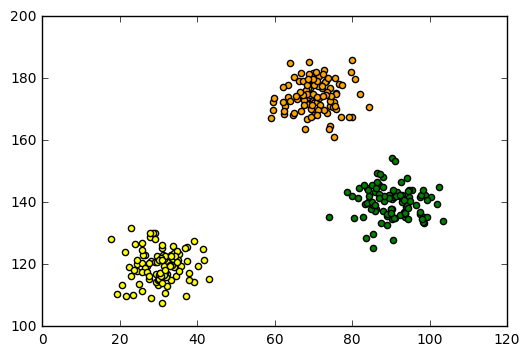

In [234]:
plt.scatter(total[:100,0], total[:100,1], c='orange', label = '0')
plt.scatter(total[100:200,0], total[100:200,1], c='yellow', label = '1')
plt.scatter(total[200:,0], total[200:,1], c='green', label = '2')

In [235]:
model.coef_[0]

array([-0.10868421,  0.33097099])

In [236]:
l1_w1 = model.coef_[0][0]
l1_w2 = model.coef_[0][1]
l1_b = model.intercept_[0]

l2_w1 = model.coef_[1][0]
l2_w2 = model.coef_[1][1]
l2_b = model.intercept_[1]

l3_w1 = model.coef_[2][0]
l3_w2 = model.coef_[2][1]
l3_b = model.intercept_[2]

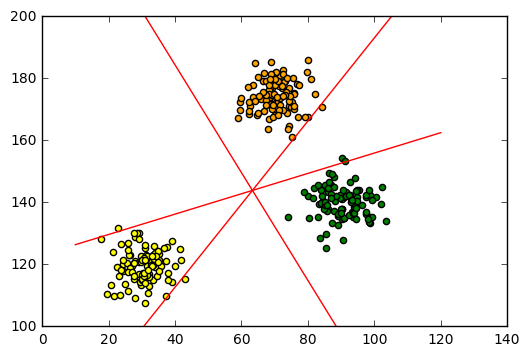

In [237]:
plt.scatter(total[:100,0], total[:100,1], c='orange', label = '0')
plt.scatter(total[100:200,0], total[100:200,1], c='yellow', label = '1')
plt.scatter(total[200:,0], total[200:,1], c='green', label = '2')
line_x = np.linspace(10,120,1000)
plt.ylim(100,200)
line_y1 = -(l1_w1/l1_w2)*line_x - l1_b/l1_w2
line_y2 = -(l2_w1/l2_w2)*line_x - l2_b/l2_w2
line_y3 = -(l3_w1/l3_w2)*line_x - l3_b/l3_w2
plt.plot(line_x, line_y1, 'r')
plt.plot(line_x, line_y2, 'r')
plt.plot(line_x, line_y3, 'r')
plt.show()

In [243]:
test = np.array([[100, 160]])
model.predict(test)

array([ 2.])